In [1]:
import pandas as pd
import numpy as np
import os, shutil
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from keras.applications import VGG16
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
original_dataset_dir="./set_close_360"

In [3]:
base_dir = "./t4"

In [10]:
conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150,150,3))
conv_base.summary()


58892288/58889256 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_____________________________________________________________

In [14]:
from keras import layers
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import cv2 as cv
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers, regularizers
import glob

In [15]:
train_fruit_images = []
train_fruit_labels = [] 
for directory_path in glob.glob("./set_close_360/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (227, 227))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_fruit_images.append(img)
        train_fruit_labels.append(fruit_label)
train_fruit_images = np.array(train_fruit_images)
train_fruit_labels = np.array(train_fruit_labels)

In [16]:
label_to_id = {v:i for i,v in enumerate(np.unique(train_fruit_labels))}
id_to_label = {v: k for k, v in label_to_id.items()}
train_label_ids = np.array([label_to_id[x] for x in train_fruit_labels])


In [17]:
train_fruit_images.shape, train_label_ids.shape, train_fruit_labels.shape

((353, 227, 227, 3), (353,), (353,))

In [21]:
# test
test_fruit_images = []
test_fruit_labels = [] 
for directory_path in glob.glob("./val/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        
        img = cv2.resize(img, (227, 227))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        
        test_fruit_images.append(img)
        test_fruit_labels.append(fruit_label)
test_fruit_images = np.array(test_fruit_images)
test_fruit_labels = np.array(test_fruit_labels)

In [22]:
test_label_ids = np.array([label_to_id[x] for x in test_fruit_labels])

In [23]:
test_fruit_images.shape, test_label_ids.shape

((79, 227, 227, 3), (79,))

In [24]:
x_train, y_train, x_test, y_test, N_CATEGORY =train_fruit_images,train_fruit_labels,test_fruit_images,test_fruit_labels,len(label_to_id)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, N_CATEGORY)

(353, 227, 227, 3) (353,) (79, 227, 227, 3) (79,) 5


In [27]:
from sklearn.preprocessing import LabelBinarizer

In [28]:


X_normalized = np.array(x_train / 255.0 - 0.5 )
X_normalized_test = np.array(x_test / 255.0 - 0.5 )

label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)
y_one_hot_test = label_binarizer.fit_transform(y_test)

In [41]:
model = Sequential()
model.add(Flatten(input_shape=(227,227,3)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid'))
model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 154587)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               39574528  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 1285      
Total params: 39,575,813
Trainable params: 39,575,813
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train model using features extracted
history = model.fit(X_normalized, y_one_hot,
                    epochs=15,
                    batch_size=15,
                    validation_data=(X_normalized_test,y_one_hot_test))

Train on 353 samples, validate on 79 samples
Epoch 1/15
353/353 [==============================] - 7s 21ms/step - loss: 10.2647 - acc: 0.7654 - val_loss: 4.1455 - val_acc: 0.8608
Epoch 2/15
353/353 [==============================] - 7s 20ms/step - loss: 5.0656 - acc: 0.8380 - val_loss: 2.6479 - val_acc: 0.8709
Epoch 3/15
353/353 [==============================] - 7s 19ms/step - loss: 1.8969 - acc: 0.8584 - val_loss: 2.3910 - val_acc: 0.8658
Epoch 4/15
353/353 [==============================] - 7s 20ms/step - loss: 1.4387 - acc: 0.8771 - val_loss: 1.9646 - val_acc: 0.8810
Epoch 5/15
353/353 [==============================] - 7s 20ms/step - loss: 1.0093 - acc: 0.8742 - val_loss: 1.6692 - val_acc: 0.8684
Epoch 6/15
353/353 [==============================] - 7s 20ms/step - loss: 0.8184 - acc: 0.8844 - val_loss: 1.4361 - val_acc: 0.8835
Epoch 7/15
353/353 [==============================] - 7s 20ms/step - loss: 0.6380 - acc: 0.8907 - val_loss: 1.6918 - val_acc: 0.8962
Epoch 8/15
353/353 [===

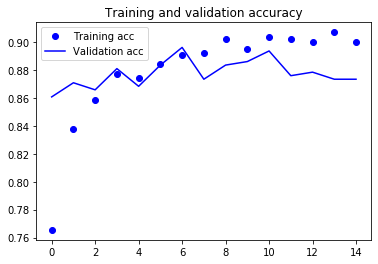

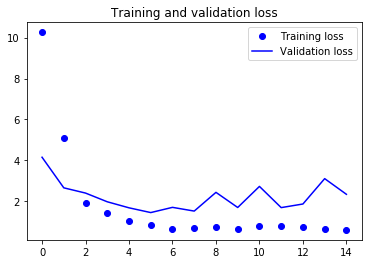

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# SECONDA RETE

In [44]:
model2 = Sequential()
model2.add(GlobalAveragePooling2D(input_shape=(227,227,3)))
model2.add(Dense(5, activation='sigmoid'))
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 3)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train model using features extracted
history = model.fit(X_normalized, y_one_hot,
                    epochs=15,
                    batch_size=15,
                    validation_data=(X_normalized_test,y_one_hot_test))

Train on 353 samples, validate on 79 samples
Epoch 1/15
353/353 [==============================] - 7s 21ms/step - loss: 1.3171 - acc: 0.8839 - val_loss: 3.0731 - val_acc: 0.8759
Epoch 2/15
353/353 [==============================] - 7s 20ms/step - loss: 1.1888 - acc: 0.8873 - val_loss: 3.0932 - val_acc: 0.8658
Epoch 3/15
353/353 [==============================] - 7s 20ms/step - loss: 1.0758 - acc: 0.8810 - val_loss: 2.5984 - val_acc: 0.8633
Epoch 4/15
353/353 [==============================] - 7s 19ms/step - loss: 1.0450 - acc: 0.8907 - val_loss: 2.7487 - val_acc: 0.8911
Epoch 5/15
353/353 [==============================] - 7s 20ms/step - loss: 0.9917 - acc: 0.9054 - val_loss: 3.1216 - val_acc: 0.8810
Epoch 6/15
353/353 [==============================] - 7s 20ms/step - loss: 0.8005 - acc: 0.9037 - val_loss: 3.1753 - val_acc: 0.9089
Epoch 7/15
353/353 [==============================] - 7s 20ms/step - loss: 0.6075 - acc: 0.9144 - val_loss: 2.2839 - val_acc: 0.8911
Epoch 8/15
353/353 [====

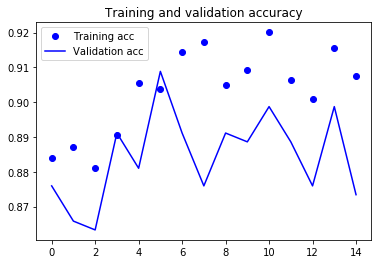

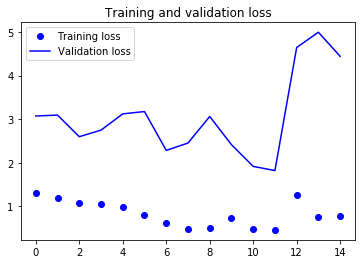

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# TERZA RETE


In [50]:
conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (227,227,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 227, 227, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 227, 227, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 227, 227, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 113, 113, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 113, 113, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 113, 113, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [51]:
model = models.Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(5, activation = 'sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 21,138,757
Non-trainable params: 0
_________________________________________________________________


In [ ]:


model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])


history = model.fit(X_normalized, y_one_hot,
                    epochs=15,
                    batch_size=15,
                    validation_data=(X_normalized_test,y_one_hot_test))

Train on 353 samples, validate on 79 samples
Epoch 1/15
353/353 [==============================] - 295s 836ms/step - loss: 1.2399 - acc: 0.7728 - val_loss: 0.4973 - val_acc: 0.8000
Epoch 2/15
353/353 [==============================] - 328s 928ms/step - loss: 0.4525 - acc: 0.8051 - val_loss: 0.4050 - val_acc: 0.8000
Epoch 3/15
353/353 [==============================] - 299s 846ms/step - loss: 0.3666 - acc: 0.8555 - val_loss: 0.2824 - val_acc: 0.8810
Epoch 4/15
353/353 [==============================] - 311s 882ms/step - loss: 0.2659 - acc: 0.8935 - val_loss: 0.3088 - val_acc: 0.8886
Epoch 5/15
195/353 [===============>..............] - ETA: 2:08 - loss: 0.2225 - acc: 0.9067